<a href="https://colab.research.google.com/github/iamatul1214/ComputerVision/blob/main/Image_understanding_computer_vision_2_(conv_and_pooling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
ROOT="/content/drive/MyDrive/Colab_practices"
os.chdir(ROOT)

In [2]:
car_image="car1.jpeg"

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [4]:
## creating a function to read an image either in grascale or in colored
def read_image(path, grayscale=True):
  image=cv2.imread(car_image)
  if grayscale:
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    plt.imshow(image,cmap='gray')
    return image
  else:
    cv2_imshow(image)
    return image

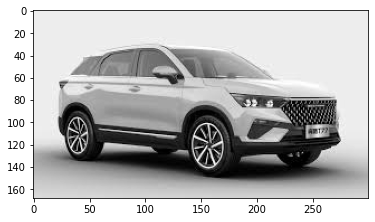

In [5]:
car=read_image(car_image)

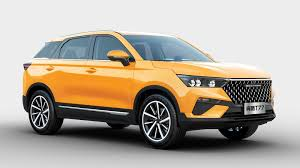

In [6]:
## reading a colored image
car_colored=read_image(path=car_image,grayscale=False)

In [7]:
## let's check the shape of both the colored and grayedscale cars
print(car.shape)
print(car_colored.shape)

(168, 300)
(168, 300, 3)


In [8]:
## Let's define the input images size
rows,columns=car.shape
print(f"rows and columns= {rows,columns}")
car=car.reshape(1,rows,columns,1)
car.shape     ## 1st 1 shows the number of images (we will put 32 if there are 32 images in the batch, other two are the size of image, last one is 1 because is grayscaled image or else it would be 3 or 4)

rows and columns= (168, 300)


(1, 168, 300, 1)

In [9]:
## Let's create a convolutional layer now for gray scale images
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                   kernel_size=(3,3),
                                   strides=(1,1),
                                   input_shape=car.shape[1:])]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


#### We have total 10 trainable parameters. How ??
#### We have 1 filter with 3*3 size which means 9 parameters + 1 biased parameters

In [10]:
## Now, we haven't trained any model yet but still let's try to predict how the image will look like if it passed throught our created CNN network
output=conv_model.predict(car)
output.shape

(1, 166, 298, 1)

### The output has shape of 1, 166, 298 ,1 which means only 1 image in batch with shape of 166,298 and that two with only 1 channel which indicates it is an gray scale image.

TypeError: ignored

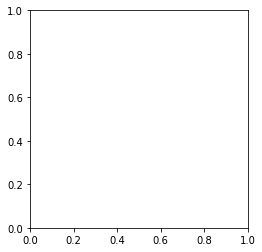

In [11]:
## Let's try to show the output image
plt.imshow(output, cmap='gray')

### The reason why we couldn't show the output image is because it has a shape of 1,166,298,1 which means 4 length and the image should only take either 2 or 3 parameters to show up.
### So let's reshape the output image below.

In [12]:
shape=output.shape[1:-1]
out=output.reshape(shape)
out.shape


(166, 298)

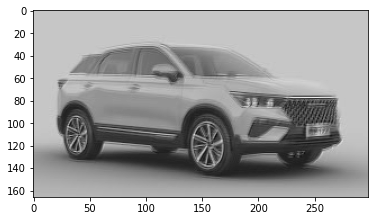

In [13]:
plt.imshow(out, cmap='gray')

In [14]:
## Let's define the input images size
rows,columns,depth=car_colored.shape
print(f"rows and columns= {rows,columns,depth}")
car_color=car_colored.reshape(1,rows,columns,depth)
car_color.shape   

rows and columns= (168, 300, 3)


(1, 168, 300, 3)

In [15]:
## Let's create a convolutional layer now for colored images
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                   kernel_size=(3,3),
                                   strides=(1,1),
                                   input_shape=car_color.shape[1:])]
conv_model_colored=tf.keras.Sequential(CONV_LAYER)
conv_model_colored.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [16]:
output_colored=conv_model_colored.predict(car_color)
output_colored.shape
## We have got 1 as output because we applied only one filter

(1, 166, 298, 1)

In [17]:
## reshaping
shape=output.shape[1:-1]
out=output_colored.reshape(shape)
out.shape

(166, 298)

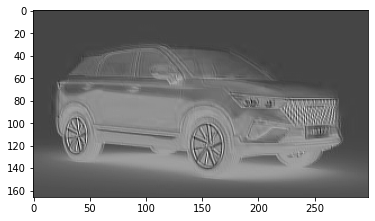

In [18]:
plt.imshow(out, cmap='gray')

In [19]:
## Let's try to display an image output with 5 filters. Since, as of now we only applied 1 filter. Let's try 5 now

In [20]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=5,
                                   kernel_size=(3,3),
                                   strides=(1,1),
                                   input_shape=car_color.shape[1:])]
conv_model_colored=tf.keras.Sequential(CONV_LAYER)
conv_model_colored.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [21]:
output_colored=conv_model_colored.predict(car_color)
output_colored.shape

(1, 166, 298, 5)

In [30]:
## reshaping
rows, cols, depth=output_colored.shape[1:]
out=output_colored.reshape(rows, cols, depth)
out.shape

(166, 298, 5)

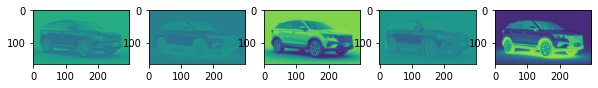

In [33]:
## Displaying all the 5 images using subplots
fig, ax= plt.subplots(1,5, figsize=(10,10))
ax[0].imshow(out[:,:,0])
ax[1].imshow(out[:,:,1])
ax[2].imshow(out[:,:,2])
ax[3].imshow(out[:,:,3])
ax[4].imshow(out[:,:,4])


### Now let's create a method for above operations so that we can use it properly

In [44]:

def reshaping_input_img(image,grayscale=True):
  if grayscale:
    row, col=image.shape
    image=image.reshape(1,row,col,1)
    return image
  row, col, depth=image.shape
  image=image.reshape(1,row,col,depth)
  return image

def get_Conv_Model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="Valid"):
  CONV_LAYER=[tf.keras.layers.Conv2D(filters=filters, 
                                     kernel_size=filter_size, 
                                     strides=strides, 
                                     input_shape=input_shape,
                                     padding=padding)]
  conv_model=tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

def apply_conv_model_and_visualize(img, conv_model):
  try:
    output=conv_model.predict(img)
    print(f"output image from prediction has shape= {output.shape}")
    row, col, depth=output.shape[1:]
    reshape_output=output.reshape(row, col, depth)

    for d in range(depth):
      plt.imshow(reshape_output[:,:,d], cmap="gray")
      plt.show()

  except Exception as e:
    raise e



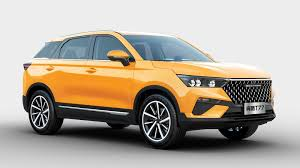

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
output image from prediction has shape= (1, 166, 298, 5)


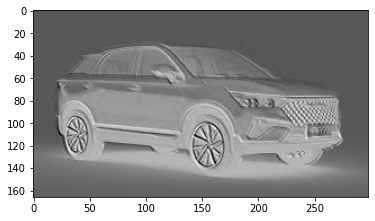

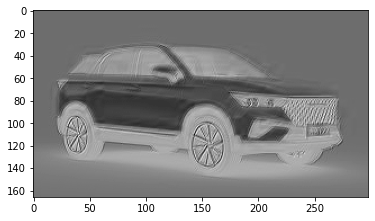

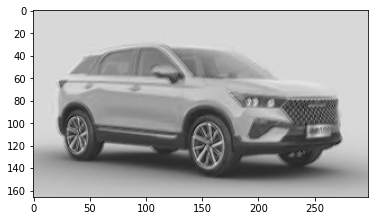

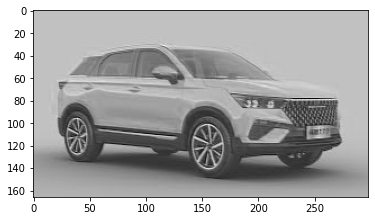

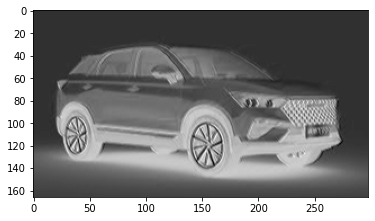

In [45]:
img=read_image(car_image,grayscale=False)
input_image=reshaping_input_img(img, grayscale=False)
model=get_Conv_Model(filters=5,filter_size=(3,3), strides=(1,1),input_shape=input_image.shape[1:])
apply_conv_model_and_visualize(input_image,model)

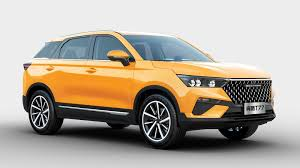

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 166, 298, 10)      280       
                                                                 
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________
output image from prediction has shape= (1, 166, 298, 10)


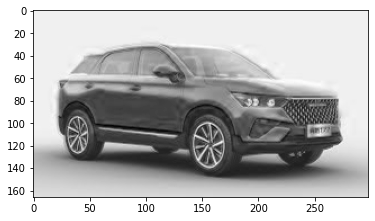

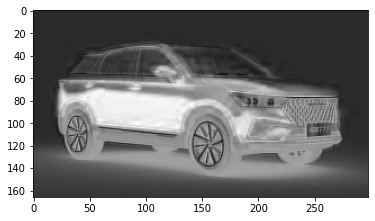

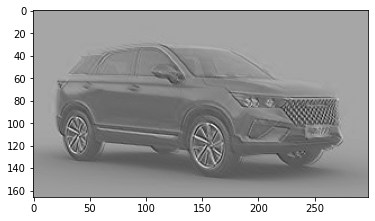

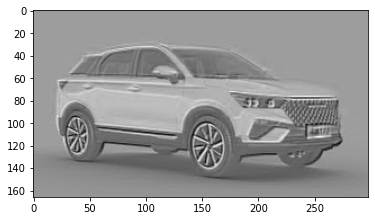

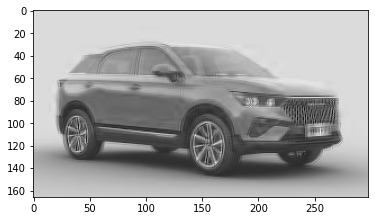

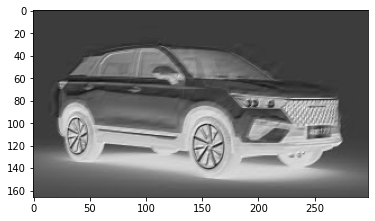

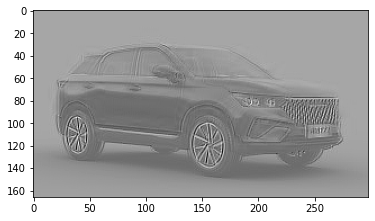

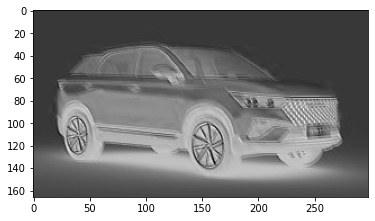

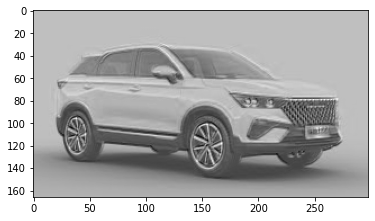

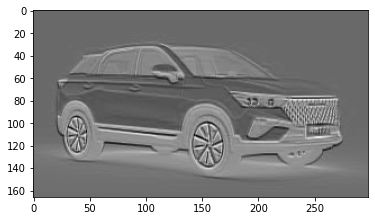

In [46]:
## Using 10 filters
img=read_image(car_image,grayscale=False)
input_image=reshaping_input_img(img, grayscale=False)
model=get_Conv_Model(filters=10,filter_size=(3,3), strides=(1,1),input_shape=input_image.shape[1:])
apply_conv_model_and_visualize(input_image,model)

## Let's understand how pooling works
### Let us define a max pooling layer

In [47]:
def max_pooling(img, pool_size=(2,2),strides=(2,2)):
  reshaped_img=reshaping_input_img(img)
  pooling_layer=tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
  result=pooling_layer(reshaped_img)
  return result

(168, 300)
(1, 84, 150, 1)


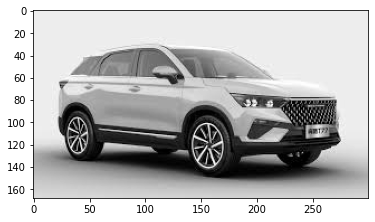

In [48]:
img=read_image(car_image)
print(img.shape)
result=max_pooling(img)
print(result.shape)

In [51]:
## method to plot the pooling image
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape=tf.reshape(result,(row,col))
  plt.imshow(reshape, cmap='gray')

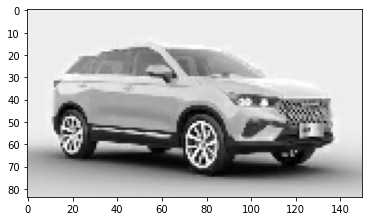

In [52]:
plot_pooling(result)

## As we can observe that the above image is bit blury. Now question comes is why to use pooling if image becomes blurry. So the answer is we have reduced the shape of image drastically, and it is blurry but still we can identify it now. Similarily we want same behviour from Computers as well.

In [54]:
## Let's try to plot the above image by passing it throught max pooling layer again
_, row, col, _ = result.shape
reshape=tf.reshape(result,(row,col))

In [55]:
result=max_pooling(reshape.numpy())
print(result.shape)

(1, 42, 75, 1)


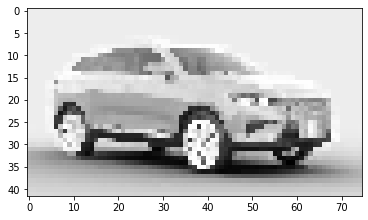

In [56]:
## Let's plot the above image which is max pooled twice
plot_pooling(result)

## So as we observed again the image has become more blurry, but still it can be identified as a car.

# Let's try global Avg pooling

In [60]:
def global_avg_pooling(img, grayscale):

  reshaped_img = reshaping_input_img(img, grayscale)
  pooling_layer = tf.keras.layers.GlobalAvgPool2D()
  result = pooling_layer(reshaped_img)
  return result

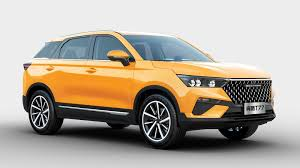

(168, 300, 3)
(1, 3)
tf.Tensor([[153 166 174]], shape=(1, 3), dtype=uint8)


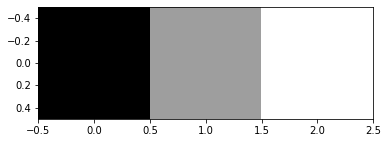

In [76]:
img = read_image(car_image, grayscale=False)
print(img.shape)
result = global_avg_pooling(img, grayscale=False)
print(result.shape)
print(result)

In [74]:
def plot_pooling(result):
  row, col= result.shape
  reshape = tf.reshape(result, (row, col))
  plt.imshow(reshape, cmap="gray")

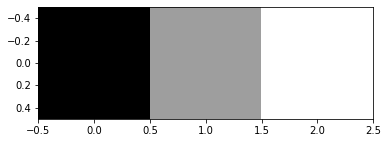

In [75]:
plot_pooling(result)